# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
pd.read_csv('desc.txt')

,Dataset yang tersedia mencakup berbagai informasi terkait ekonomi dan kesejahteraan di Indonesia
0,provinsi: memuat informasi tentang pembagian b...
1,tahun: memuat informasi tentang jenis pengeluaran
2,periode: memuat informasi tentang pembagian be...
3,upah: memuat informasi tentang Rata-Rata Upah ...
4,ump: mencatat data tentang Upah Minimum Provin...
5,gk: memuat data Garis Kemiskinan per Kapita
6,peng: memuat informasi tentang Rata-Rata Penge...


In [ ]:
df_load = pd.read_csv('kesejahteraanPekerja.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df_load

,provinsi,tahun,gk,periode,ump,peng,upah
0,ACEH,2015,293697.0,MARET,1900000.0,395136.0,11226
1,ACEH,2015,293697.0,MARET,1900000.0,260183.0,11226
2,ACEH,2015,293697.0,MARET,1900000.0,655319.0,11226
3,ACEH,2015,293697.0,MARET,1900000.0,466355.0,11226
4,ACEH,2015,293697.0,MARET,1900000.0,529945.0,11226
...,...,...,...,...,...,...,...
45355,INDONESIA,2022,535547.0,SEPTEMBER,2729463.0,828158.0,17542
45356,INDONESIA,2022,535547.0,SEPTEMBER,2729463.0,1549242.0,17542
45357,INDONESIA,2022,535547.0,SEPTEMBER,2729463.0,665756.0,17542
45358,INDONESIA,2022,535547.0,SEPTEMBER,2729463.0,662025.0,17542


In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45360 entries, 0 to 45359
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  45360 non-null  object 
 1   tahun     45360 non-null  int64  
 2   gk        44928 non-null  float64
 3   periode   45360 non-null  object 
 4   ump       45360 non-null  float64
 5   peng      44928 non-null  float64
 6   upah      45360 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.4+ MB


In [ ]:
df_load.isnull().sum()

,0
provinsi,0
tahun,0
gk,432
periode,0
ump,0
peng,432
upah,0


In [ ]:
df_load.describe()

,tahun,gk,ump,peng,upah
count,45360.000000,44928.000000,4.536000e+04,4.492800e+04,45360.000000
mean,2018.500000,303480.478966,2.311369e+06,7.596263e+05,16621.010714
std,2.291313,161760.408866,6.020817e+05,3.546992e+05,4364.037387
min,2015.000000,48561.000000,9.100000e+05,1.760280e+05,8525.000000
25%,2016.750000,138142.750000,1.877250e+06,5.010822e+05,13468.750000
50%,2018.500000,314506.000000,2.268432e+06,6.595245e+05,15845.000000
75%,2020.250000,413791.750000,2.688292e+06,9.457802e+05,18634.750000
max,2022.000000,872843.000000,4.641854e+06,2.525347e+06,32685.000000


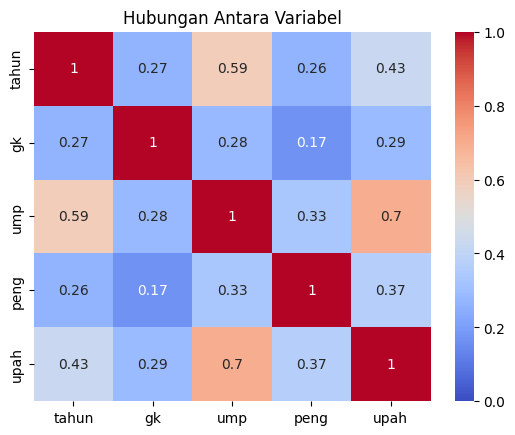

In [ ]:
df_load_num = df_load.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_load_num.corr(), cmap='coolwarm', vmin=0, vmax=1, annot=True)
plt.title('Hubungan Antara Variabel')
plt.show()

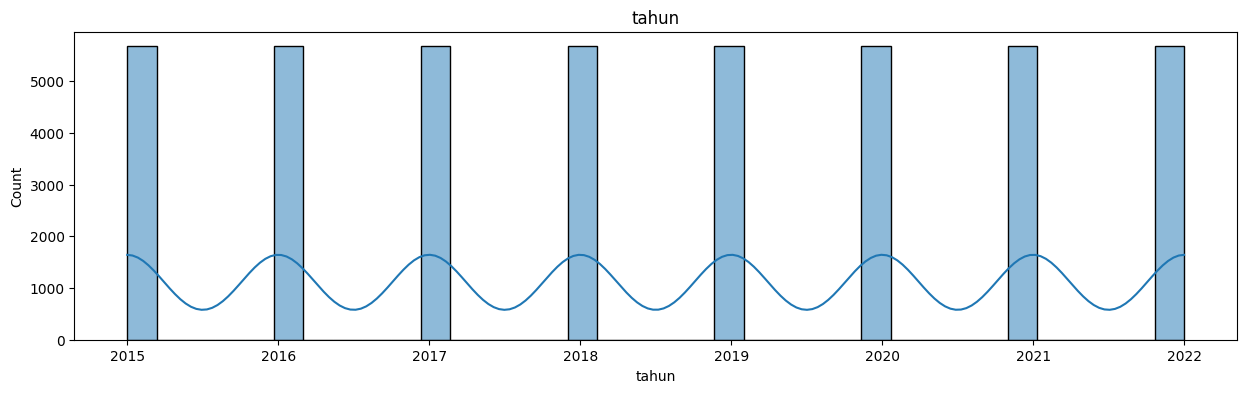

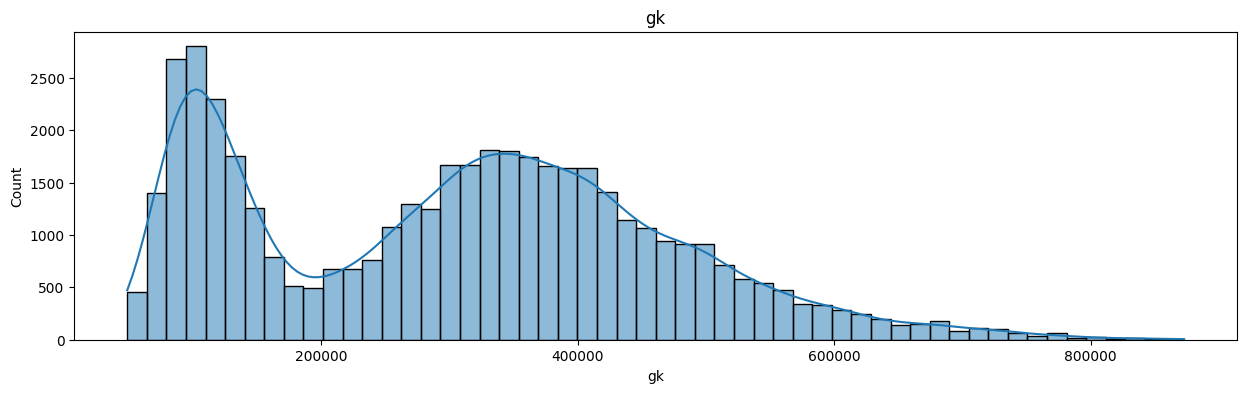

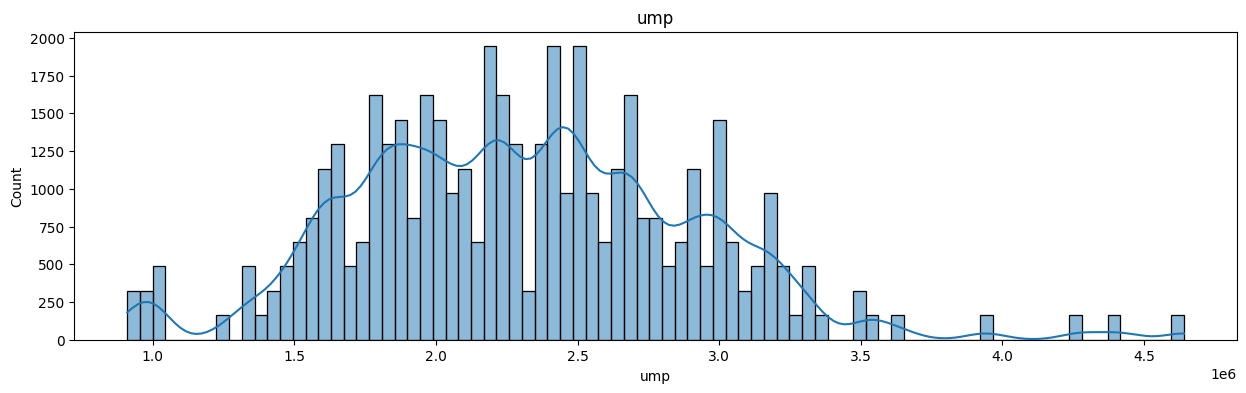

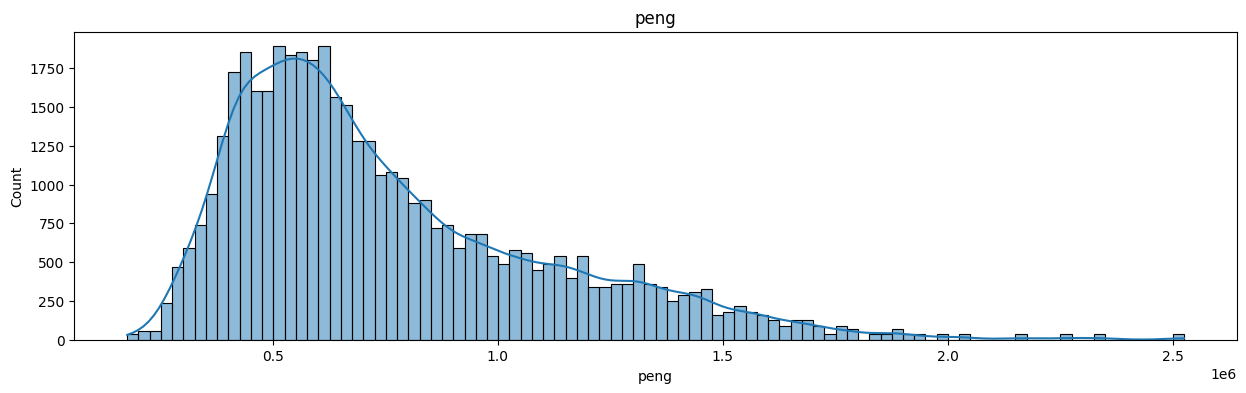

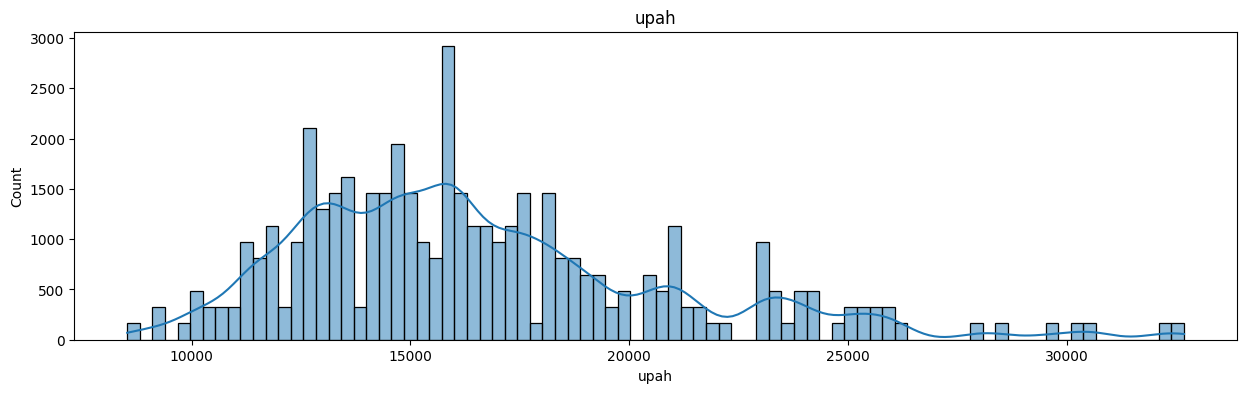

In [ ]:
for i, column in enumerate(df_load_num, 1):
    plt.figure(figsize=(15, 4))
    sns.histplot(df_load_num[column], kde=True)
    plt.title(column)

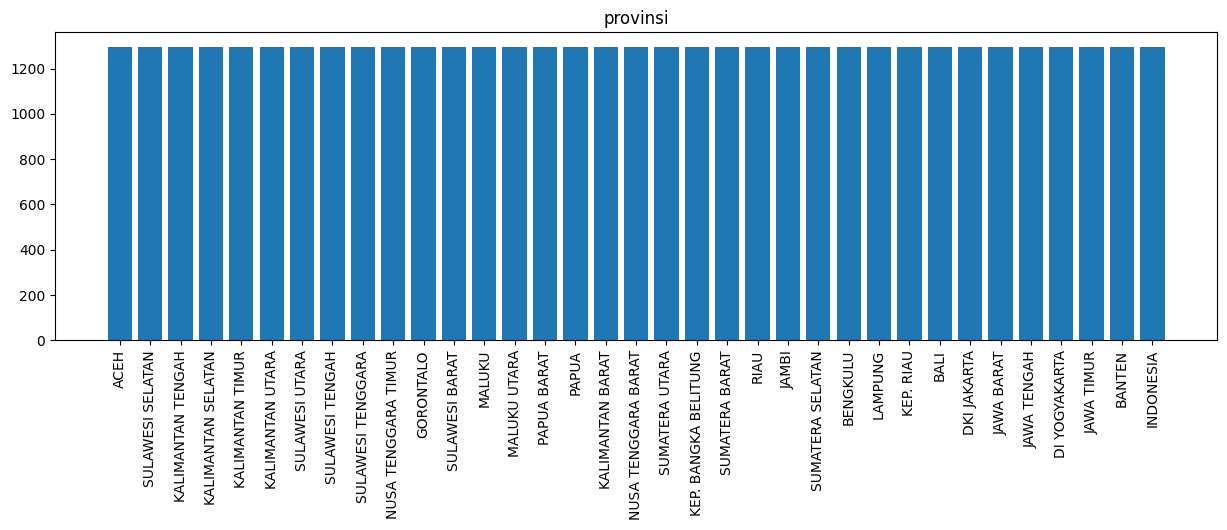

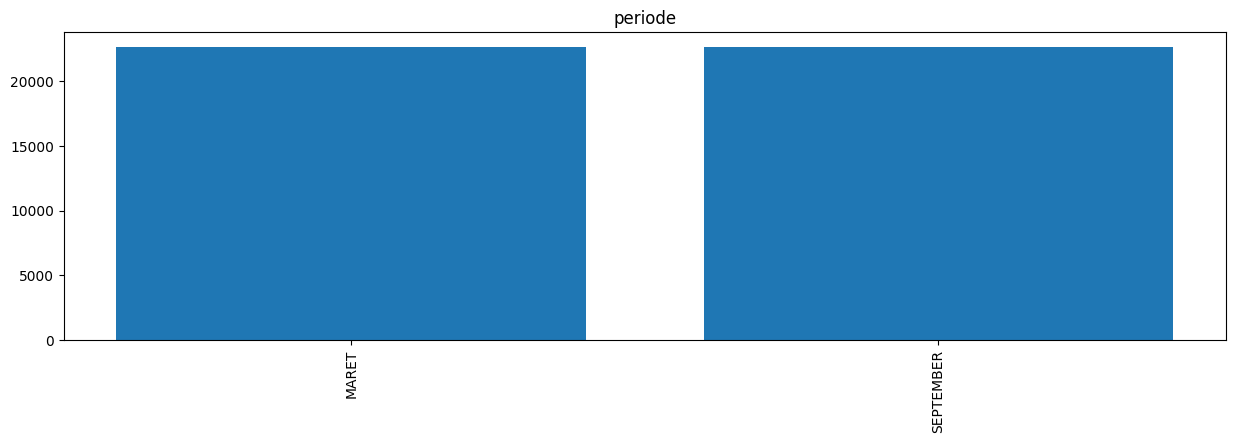

In [ ]:
df_load_cat = df_load.select_dtypes(include='object').filter(regex='^(?!.*(ID|Date)).*')

for i, column in enumerate(df_load_cat, 1):
    plt.figure(figsize=(15, 4))
    val = df_load_cat[column].value_counts().head(50)
    plt.bar(val.index, val)
    plt.xticks(rotation=90)
    plt.title(column)

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
print(df_load.isnull().sum(), df_load.duplicated().sum())
df_load.info()
df_load.describe(include='all')

provinsi      0
tahun         0
gk          432
periode       0
ump           0
peng        432
upah          0
dtype: int64 1004
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45360 entries, 0 to 45359
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  45360 non-null  object 
 1   tahun     45360 non-null  int64  
 2   gk        44928 non-null  float64
 3   periode   45360 non-null  object 
 4   ump       45360 non-null  float64
 5   peng      44928 non-null  float64
 6   upah      45360 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.4+ MB


,provinsi,tahun,gk,periode,ump,peng,upah
count,45360,45360.000000,44928.000000,45360,4.536000e+04,4.492800e+04,45360.000000
unique,35,NaN,NaN,2,NaN,NaN,NaN
top,ACEH,NaN,NaN,MARET,NaN,NaN,NaN
freq,1296,NaN,NaN,22680,NaN,NaN,NaN
mean,NaN,2018.500000,303480.478966,NaN,2.311369e+06,7.596263e+05,16621.010714
std,NaN,2.291313,161760.408866,NaN,6.020817e+05,3.546992e+05,4364.037387
min,NaN,2015.000000,48561.000000,NaN,9.100000e+05,1.760280e+05,8525.000000
25%,NaN,2016.750000,138142.750000,NaN,1.877250e+06,5.010822e+05,13468.750000
50%,NaN,2018.500000,314506.000000,NaN,2.268432e+06,6.595245e+05,15845.000000
75%,NaN,2020.250000,413791.750000,NaN,2.688292e+06,9.457802e+05,18634.750000


In [ ]:
df_load.dropna(inplace=True)

In [ ]:
df_load.drop_duplicates(inplace=True)

In [ ]:
df_load_num = df_load.select_dtypes(include=['int64', 'float64'])

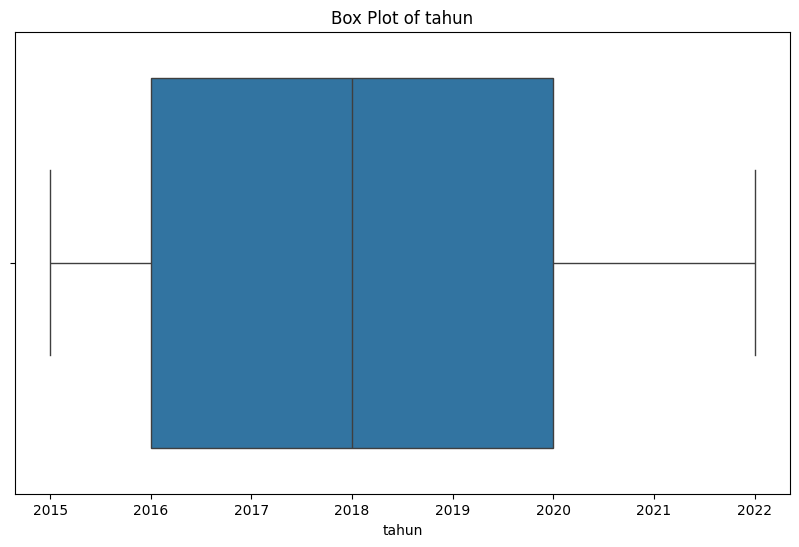

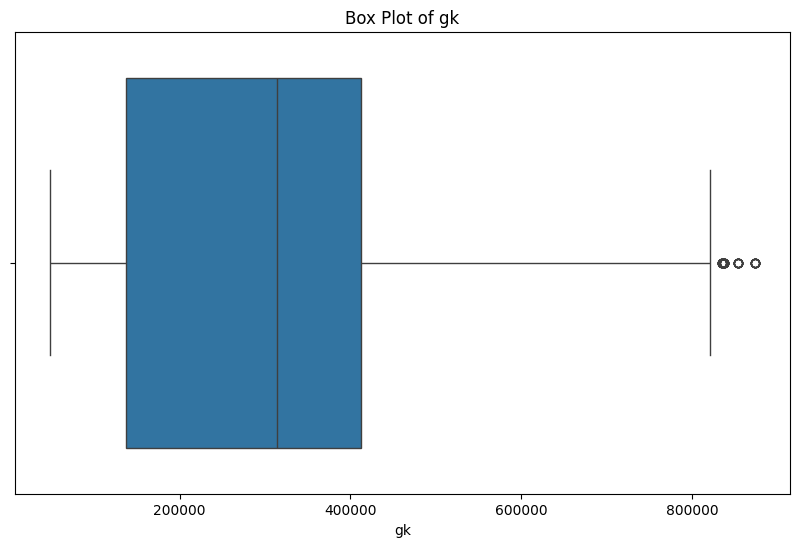

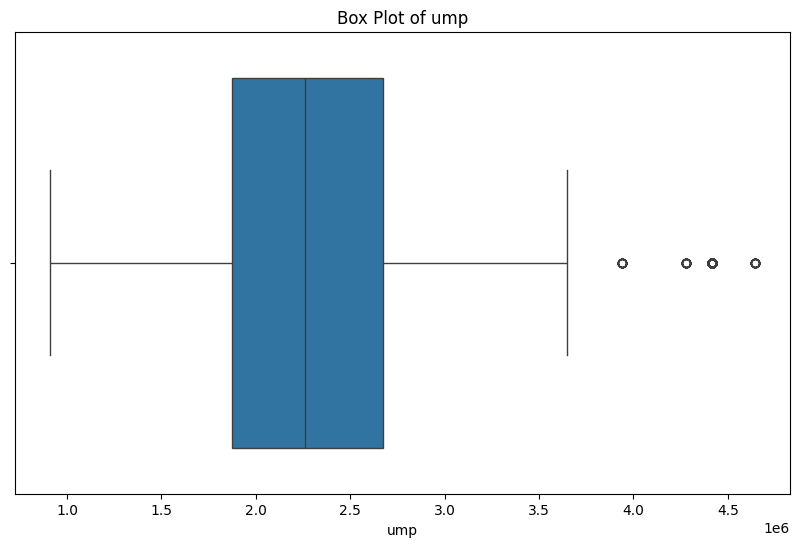

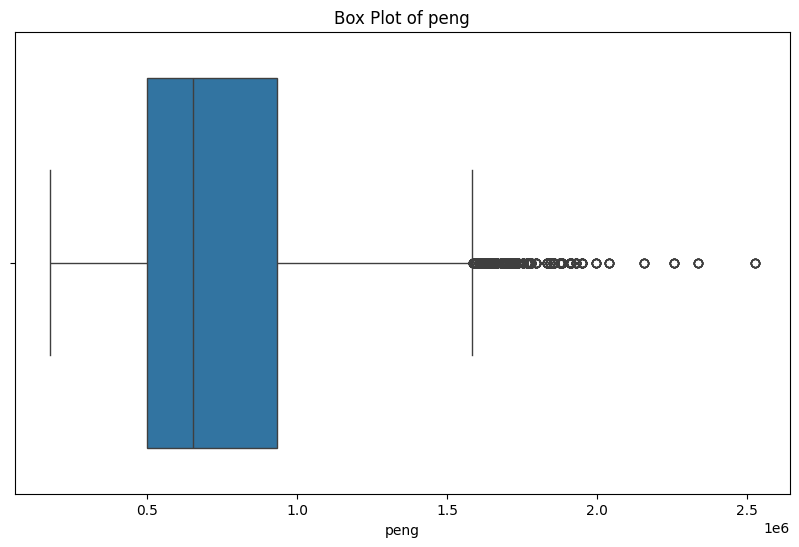

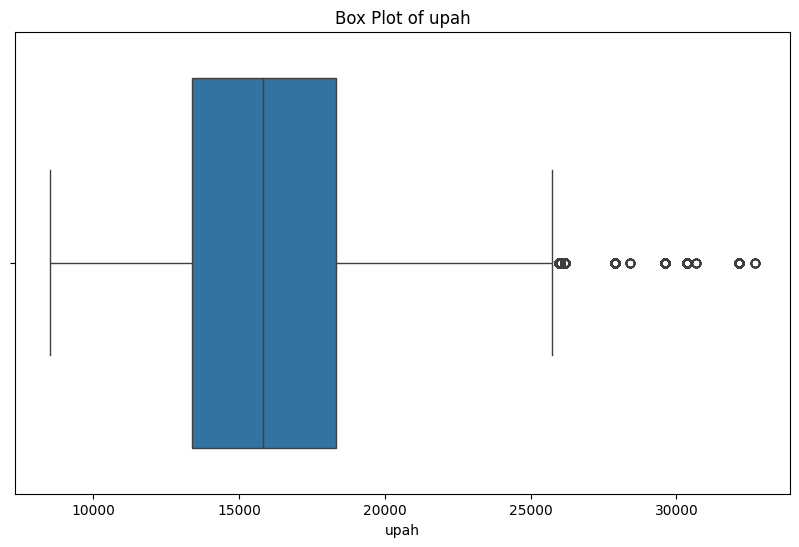

In [ ]:
for feature in df_load_num:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_load_num[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
for _, col in enumerate(df_load_num, 1):
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df_load_num[col].quantile(0.25)
    Q3 = df_load_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = df_load_num[(df_load_num[col] < lower_bound) | (df_load_num[col] > upper_bound)]

    # Menghapus outlier dari DataFrame
    df_load_num = df_load_num.drop(outliers.index)

In [ ]:
# Standarisasi: distribusi tidak ada yang terlalu skewed dan outlier yang ada tidak berarti, mengecilkan rentang data
scaler = RobustScaler()
df_load_num.drop(columns=['tahun'], inplace=True)
df_load_num_scaled = scaler.fit_transform(df_load_num)

In [ ]:
pca = PCA(n_components=4)
reduced_data = pca.fit_transform(df_load_num_scaled)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
dbscan = DBSCAN(eps=0.003, min_samples=5)

In [ ]:
df_load_num['cluster'] = dbscan.fit_predict(reduced_data)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
valid_clusters = merged_data['cluster'] != -1

reduced_data_valid = reduced_data[valid_clusters]
merged_data_valid = merged_data.loc[valid_clusters, 'cluster']

if len(set(merged_data_valid)) > 1:
    sil_score = silhouette_score(reduced_data_valid, merged_data_valid)
    print(f"Silhouette Score: {sil_score}")
else:
    print("Cluster hanya ada 1 (Tidak Valid)")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
# df['cluster'] = dbscan.labels_

# cluster_labels = {
#     -1: 'Penipuan',
#     0: 'Normal',
#     1: 'Mencurigakan'
# }

# df['cluster_label'] = df['cluster'].map(cluster_labels)

<ipython-input-257-dad3b07ba9d7>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], cmap='rainbow', s=50, alpha=0.1)


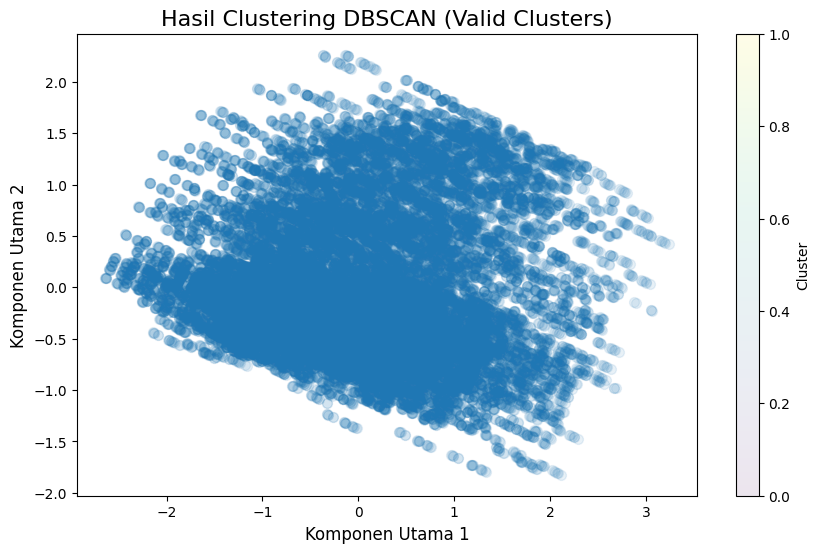

In [ ]:
reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], cmap='rainbow', s=50, alpha=0.1)
plt.title('Hasil Clustering DBSCAN (Valid Clusters)', fontsize=16)
plt.xlabel('Komponen Utama 1', fontsize=12)
plt.ylabel('Komponen Utama 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df_load_num.describe()

,gk,ump,peng,upah,cluster
count,41847.000000,4.184700e+04,4.184700e+04,41847.000000,41847.000000
mean,296153.714269,2.236440e+06,7.205345e+05,15934.131336,-0.999570
std,156654.149566,5.299718e+05,3.047614e+05,3527.309845,0.026772
min,48561.000000,9.100000e+05,1.760280e+05,8525.000000,-1.000000
25%,132451.000000,1.850000e+06,4.907540e+05,13238.000000,-1.000000
50%,310295.000000,2.227307e+06,6.386050e+05,15624.000000,-1.000000
75%,405341.000000,2.630162e+06,8.958880e+05,18089.000000,-1.000000
max,820543.000000,3.648036e+06,1.574391e+06,25736.000000,1.000000


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.